## Slug Test for Confined Aquifer
**This test is taken from examples of AQTESOLV.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ttim

Set background parameters:

In [2]:
H0 = 2.798  # initial displacement in m
b = -6.1  # aquifer thickness
rw1 = 0.102  # well radius of Ln-2 Well
rw2 = 0.071  # well radius of observation Ln-3 Well
rc1 = 0.051  # casing radius of Ln-2 Well
rc2 = 0.025  # casing radius of Ln-3 Well
r = 6.45  # distance from observation well to test well

Slug:

In [3]:
Q = np.pi * rc1**2 * H0
print("Slug:", round(Q, 5), "m^3")

Slug: 0.02286 m^3


Load data:

In [4]:
data1 = np.loadtxt("data/ln-2.txt")
t1 = data1[:, 0] / 60 / 60 / 24  # convert time from seconds to days
h1 = data1[:, 1]
data2 = np.loadtxt("data/ln-3.txt")
t2 = data2[:, 0] / 60 / 60 / 24
h2 = data2[:, 1]

Create single layer conceptual model:

In [5]:
ml_0 = ttim.ModelMaq(kaq=10, z=[0, b], Saq=1e-4, tmin=1e-5, tmax=0.01)
w_0 = ttim.Well(
    ml_0, xw=0, yw=0, rw=rw1, rc=rc1, tsandQ=[(0, -Q)], layers=0, wbstype="slug"
)
ml_0.solve()

self.neq  1
solution complete


Calibrate with two datasets simultaneously:

In [6]:
# unknown parameters: kaq, Saq
ca_0 = ttim.Calibrate(ml_0)
ca_0.set_parameter(name="kaq0", initial=10)
ca_0.set_parameter(name="Saq0", initial=1e-4)
ca_0.series(name="Ln-2", x=0, y=0, layer=0, t=t1, h=h1)
ca_0.series(name="Ln-3", x=r, y=0, layer=0, t=t2, h=h2)
ca_0.fit(report=True)

.....................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 162
    # variables        = 2
    chi-square         = 0.01697472
    reduced chi-square = 1.0609e-04
    Akaike info crit   = -1480.50745
    Bayesian info crit = -1474.33226
[[Variables]]
    kaq0:  1.16610844 +/- 0.00292541 (0.25%) (init = 10)
    Saq0:  9.3821e-06 +/- 1.1585e-07 (1.23%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.502


In [7]:
display(ca_0.parameters)
print("RMSE:", ca_0.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,1.16611,2.925411e-03,0.25087,-inf,inf,10,[1.166108439006008]
Saq0,9.38211e-06,1.158516e-07,1.23481,-inf,inf,0.0001,[9.382108899818189e-06]


RMSE: 0.01023631976154498


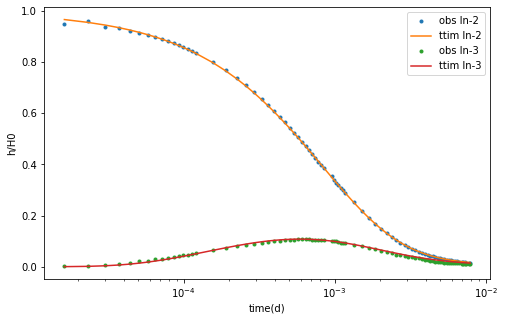

In [8]:
hm1_0 = ml_0.head(0, 0, t1, layers=0)
hm2_0 = ml_0.head(r, 0, t2, layers=0)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1 / H0, ".", label="obs ln-2")
plt.semilogx(t1, hm1_0[0] / H0, label="ttim ln-2")
plt.semilogx(t2, h2 / H0, ".", label="obs ln-3")
plt.semilogx(t2, hm2_0[0] / H0, label="ttim ln-3")
plt.xlabel("time(d)")
plt.ylabel("h/H0")
plt.legend();

Try adding well skin resistance res:

In [9]:
ml_1 = ttim.ModelMaq(kaq=10, z=[0, b], Saq=1e-4, tmin=1e-5, tmax=0.01)
w_1 = ttim.Well(
    ml_1, xw=0, yw=0, rw=rw1, res=0, rc=rc1, tsandQ=[(0, -Q)], layers=0, wbstype="slug"
)
ml_1.solve()

self.neq  1
solution complete


In [10]:
# unknown parameters: kaq, Saq, res
ca_1 = ttim.Calibrate(ml_1)
ca_1.set_parameter(name="kaq0", initial=10)
ca_1.set_parameter(name="Saq0", initial=1e-4)
ca_1.set_parameter_by_reference(name="res", parameter=w_1.res, initial=0)
ca_1.series(name="Ln-2", x=0, y=0, layer=0, t=t1, h=h1)
ca_1.series(name="Ln-3", x=r, y=0, layer=0, t=t2, h=h2)
ca_1.fit(report=True)

................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 162
    # variables        = 3
    chi-square         = 0.01690828
    reduced chi-square = 1.0634e-04
    Akaike info crit   = -1479.14278
    Bayesian info crit = -1469.87999
[[Variables]]
    kaq0:  1.16580197 +/- 0.00293850 (0.25%) (init = 10)
    Saq0:  9.3657e-06 +/- 1.1724e-07 (1.25%) (init = 0.0001)
    res:   3.0688e-04 +/- 3.6012e-04 (117.35%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.482
    C(Saq0, res)  = -0.157


In [11]:
display(ca_1.parameters)
print("RMSE:", ca_1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,1.1658,2.938501e-03,0.252058,-inf,inf,10,[1.1658019679476392]
Saq0,9.36566e-06,1.172392e-07,1.2518,-inf,inf,0.0001,[9.36565528100193e-06]
res,0.000306885,3.601222e-04,117.348,-inf,inf,0,[0.000306884543573789]


RMSE: 0.010216267246558788


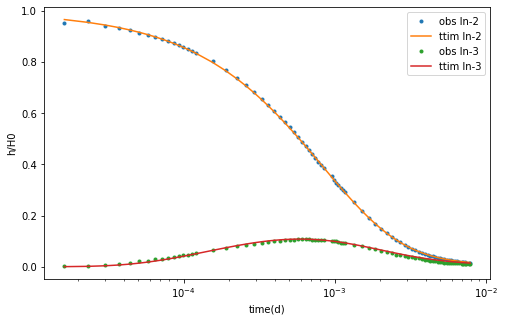

In [12]:
hm1_1 = ml_1.head(0, 0, t1, layers=0)
hm2_1 = ml_1.head(r, 0, t2, layers=0)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1 / H0, ".", label="obs ln-2")
plt.semilogx(t1, hm1_1[0] / H0, label="ttim ln-2")
plt.semilogx(t2, h2 / H0, ".", label="obs ln-3")
plt.semilogx(t2, hm2_1[0] / H0, label="ttim ln-3")
plt.xlabel("time(d)")
plt.ylabel("h/H0")
plt.legend();

Adding well screen resistance does not improve the performance obviously. While the AIC value increases. Thus, res should be removed from the model.

Try multilayer conceptual model:

In [13]:
# Determine elevations of each layer.
# Thickness of each layer is set to be 0.5 m.
z = np.arange(0, b, -0.5)
zlay = np.append(z, b)
nlay = len(zlay) - 1
Saq_2 = 1e-4 * np.ones(nlay)
n = np.arange(0, 13, 1)

In [14]:
ml_2 = ttim.Model3D(
    kaq=10, z=zlay, Saq=Saq_2, kzoverkh=1, tmin=1e-5, tmax=0.01, phreatictop=True
)
w_2 = ttim.Well(
    ml_2, xw=0, yw=0, rw=rw1, tsandQ=[(0, -Q)], layers=n, rc=rc1, wbstype="slug"
)
ml_2.solve()

self.neq  13
solution complete


Calibrate with two datasets simultaneously:

In [15]:
ca_2 = ttim.Calibrate(ml_2)
ca_2.set_parameter(name="kaq0_12", initial=10)
ca_2.set_parameter(name="Saq0_12", initial=1e-4, pmin=0)
ca_2.series(name="Ln-2", x=0, y=0, layer=n, t=t1, h=h1)
ca_2.series(name="Ln-3", x=r, y=0, layer=n, t=t2, h=h2)
ca_2.fit(report=True)

...................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 32
    # data points      = 2106
    # variables        = 2
    chi-square         = 0.21986254
    reduced chi-square = 1.0450e-04
    Akaike info crit   = -19302.3305
    Bayesian info crit = -19291.0254
[[Variables]]
    kaq0_12:  1.16570162 +/- 8.1176e-04 (0.07%) (init = 10)
    Saq0_12:  8.6904e-06 +/- 2.9609e-08 (0.34%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_12, Saq0_12) = -0.503


In [16]:
display(ca_2.parameters)
print("RMSE:", ca_2.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_12,1.1657,8.117623e-04,0.0696372,-inf,inf,10,"[1.1657016194139789, 1.1657016194139789, 1.165..."
Saq0_12,8.69035e-06,2.960946e-08,0.340716,0.0,inf,0.0001,"[8.69035475870028e-06, 8.69035475870028e-06, 8..."


RMSE: 0.010217542096555829


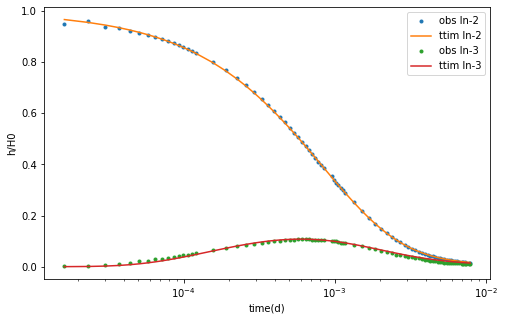

In [17]:
hm1_2 = ml_2.head(0, 0, t1, layers=n)
hm2_2 = ml_2.head(r, 0, t2, layers=n)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1 / H0, ".", label="obs ln-2")
plt.semilogx(t1, hm1_2[0] / H0, label="ttim ln-2")
plt.semilogx(t2, h2 / H0, ".", label="obs ln-3")
plt.semilogx(t2, hm2_2[0] / H0, label="ttim ln-3")
plt.xlabel("time(d)")
plt.ylabel("h/H0")
plt.legend();

## Summary of values presented by AQTESOLV & MLU

In [18]:
t = pd.DataFrame(
    columns=["k [m/d]", "Ss [1/m]"],
    index=["MLU", "AQTESOLV", "ttim-single", "ttim-multi"],
)
t.loc["AQTESOLV"] = [1.166, 9.368e-06]
t.loc["MLU"] = [1.311, 8.197e-06]
t.loc["ttim-single"] = ca_0.parameters["optimal"].values
t.loc["ttim-multi"] = ca_2.parameters["optimal"].values
t["RMSE"] = [0.010373, 0.009151, ca_0.rmse(), ca_1.rmse()]
t

,k [m/d],Ss [1/m],RMSE
MLU,1.311,8.197e-06,0.010373
AQTESOLV,1.166,9.368e-06,0.009151
ttim-single,1.16611,9.38211e-06,0.010236
ttim-multi,1.1657,8.69035e-06,0.010216
